<a href="https://colab.research.google.com/github/sharifovrus/TIP_Dividends/blob/main/TIP_Dividends.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
data = pd.read_csv('TIP_Dividends.csv')

In [ ]:
data.head()

,Date,Dividends
0,2018-08-01,0.468
1,2018-09-04,0.386
2,2018-10-01,0.101
3,2018-11-01,0.091
4,2018-12-03,0.155


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       47 non-null     object 
 1   Dividends  47 non-null     float64
dtypes: float64(1), object(1)
memory usage: 880.0+ bytes


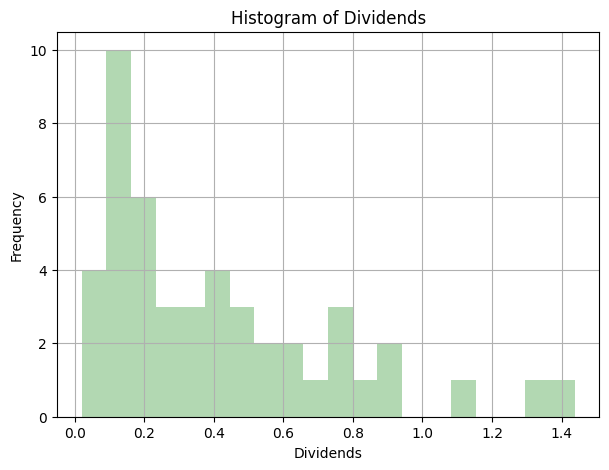

In [ ]:
dividends = data['Dividends']

# Plot a histogram
plt.figure(figsize=(7, 5))
plt.hist(dividends, bins=20, color='green', alpha=0.3)
plt.xlabel('Dividends')
plt.ylabel('Frequency')
plt.title('Histogram of Dividends')
plt.grid(True)
plt.show()

In [ ]:
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data[['Dividends']])

In [ ]:
sequence_length = 5  # Number of past years to consider for prediction
sequences = []
labels = []
for i in range(len(data_scaled) - sequence_length):
    sequences.append(data_scaled[i:i+sequence_length])
    labels.append(data_scaled[i+sequence_length])

X = np.array(sequences)
y = np.array(labels)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [ ]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

In [ ]:
model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
2/2 [==============================] - 3s 17ms/step - loss: 0.1335
Epoch 2/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1248
Epoch 3/50
2/2 [==============================] - 0s 10ms/step - loss: 0.1172
Epoch 4/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1107
Epoch 5/50
2/2 [==============================] - 0s 11ms/step - loss: 0.1045
Epoch 6/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0987
Epoch 7/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0926
Epoch 8/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0874
Epoch 9/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0820
Epoch 10/50
2/2 [==============================] - 0s 10ms/step - loss: 0.0766
Epoch 11/50
2/2 [==============================] - 0s 11ms/step - loss: 0.0715
Epoch 12/50
2/2 [==============================] - 0s 13ms/step - loss: 0.0668
Epoch 13/50
2/2 [==============================] - 0s 13ms/st

In [ ]:
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Training Loss: {train_loss}, Testing Loss: {test_loss}')

Training Loss: 0.050145141780376434, Testing Loss: 0.09305711090564728


In [ ]:
predicted_scaled = model.predict(X_test)
predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)
print("Predicted Dividends:")
print(predicted.flatten())
print("Actual Dividends:")
print(actual.flatten())

1/1 [==============================] - 0s 43ms/step
Predicted Dividends:
[0.49875528 0.56527823 0.6005356  0.58435696 0.514602   0.49967414
 0.43781635 0.34825537 0.37028804]
Actual Dividends:
[1.154 1.438 0.131 0.349 0.127 0.569 0.313 0.504 0.221]


Predicted Dividends:
[0.49875528 0.56527823 0.6005356  0.58435696 0.514602   0.49967414
 0.43781635 0.34825537 0.37028804]
Actual Dividends:
[1.154 1.438 0.131 0.349 0.127 0.569 0.313 0.504 0.221]
